In [1]:
#Community imports
import h5py
import os
import numpy as np
from datetime import datetime
from shapely.geometry import Polygon, box
import matplotlib.pyplot as plt

C:\Users\kingj\AppData\Local\Continuum\anaconda3\envs\wavelet\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#pyWavelet imports
from atm import atm
import timefunc

In [3]:
atm_dir= "./data/atm"
atm_path = []
atm_file = []
for file in os.listdir(atm_dir):
    if file.endswith(".h5"):
        print(os.path.join(atm_dir, file))
        atm_path.append(os.path.join(atm_dir, file))
        atm_file.append(file)

./data/atm\ILATM1B_20160419_130300.ATM5AT2.h5


In [4]:
atm_data = atm(atm_path[0], 'full')
atm_data.calcutc()
print(atm_data.file_epoch)
print(datetime.fromtimestamp(atm_data.utc_time[0]))

2016-04-19 13:03:00
2016-04-19 13:02:43.165000


In [22]:
#comes in xmin, ymin, xmax, ymax
xmin, ymin, xmax, ymax = atm_data.extent
atm_poly = box(-xmin, ymin, -xmax, ymax)
atm_x, atm_y = atm_poly.exterior.xy
print(atm_poly)

POLYGON ((-93.27566300000001 79.98822699999999, -93.27566300000001 80.474024, -93.20387599999998 80.474024, -93.20387599999998 79.98822699999999, -93.27566300000001 79.98822699999999))


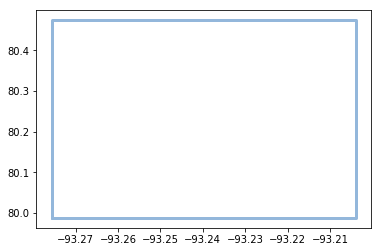

In [23]:
plt.plot(atm_x, atm_y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2);

Generate atm objects for each file

In [14]:
atm_data = [atm(ap, 'min') for ap in atm_path]